C:\Users\ayush\AppData\Local\Temp\ipykernel_46356\943559853.py:12: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()
C:\Users\ayush\AppData\Local\Temp\ipykernel_46356\943559853.py:76: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)


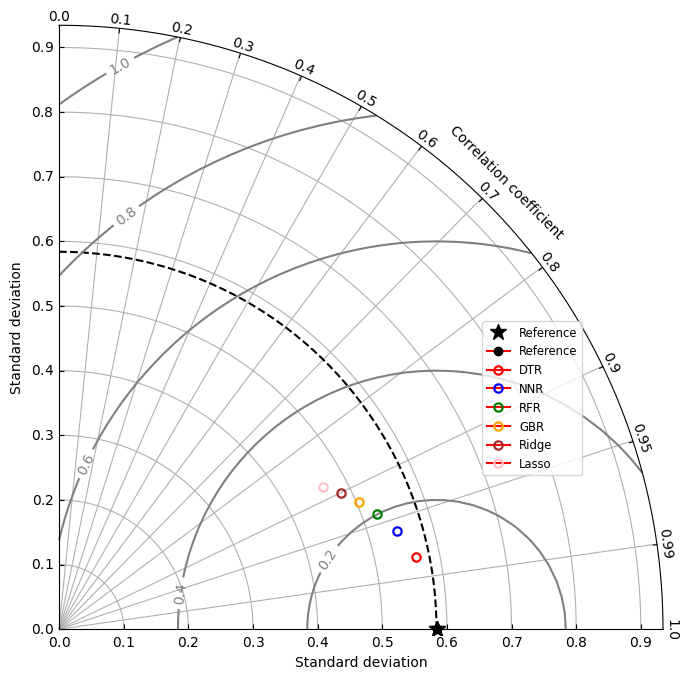

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa


class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs)
        gl1 = gf.FixedLocator(tlocs)
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        self.smin = 0
        self.smax = 1.6 * self.STD
        gh = fa.GridHelperCurveLinear(tr, extremes=(0, (np.pi / 2), self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1,)
        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')

        ax.axis['bottom'].set_visible(False)
        ax.grid()
        self._ax = ax
        self.ax = ax.get_aux_axes(tr)

        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        l1, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, (np.pi / 2.0))
        t1 = np.linspace(0, (np.pi / 2.0))
        r = np.zeros_like(t) + self.STD
        r1 = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        self.samplePoints = [l]
        self.samplePoints = [l1]

    def add_sample(self, STD, r, color='red', *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, *args, color=color, **kwargs)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours


def srl(obsSTD, obsR, s_models, r_models, labels, colors, fname, save_path):
    fig = plt.figure(figsize=(8, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)

    dia.add_sample(obsSTD, obsR, label='Reference', marker='o', mec='black', mfc='black')
    gap = 0.02
    for i, (s, r, label, color) in enumerate(zip(s_models, r_models, labels, colors)):
        corr_position = obsR - (i + 1) * gap
        std_position = obsSTD - (i + 1) * gap
        dia.add_sample(std_position, corr_position, label=label, marker='o', mec=color, mfc='none', mew=1.6)

    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[0.7, 0.3])

    plt.savefig(os.path.join(save_path, fname))  
    plt.show()

obsSTD = 0.583946649948677
obsR = 0.9999999999999999

s_models = [ 0.539797, 0.467344,  0.402033,  0.50927, 0.498857, 0.356731]
r_models = [0.7694797743693019, 0.7669770477710603, 0.8004131264860203, 0.7830002746724938, 0.861979638601181, 0.7583960383241045]
labels = ['DTR', 'NNR', 'RFR', 'GBR', 'Ridge', 'Lasso']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'pink']
fname = 'TaylorDiagram_FoamData.jpg'
save_path = r'C:\Users\ayush\Downloads'  
srl(obsSTD, obsR, s_models, r_models, labels, colors, fname, save_path)